In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide: Chapter 17: Derivations

Suppose you have a ``music21`` score that was organized something like this:

![Figure 17.1: Score hierarchy](graphicalRepresentation/music21_hierarchy.jpg)

What we've seen already is that iterating over the score via, ``for n in score: print n`` will only get you the highest level of objects, namely the ``Metadata`` object and the two ``Part`` objects.  The inner objects, measures, clefs, notes, etc. Will not be available.  The simplest way of getting at all these objects is with the ``Stream.flat`` property.  Calling it on this score will change the representation so that only the non-stream elements (the pink ovals) remain in the score:

![Figure 17.2: Flat Score](graphicalRepresentation/music21_flat.jpg)

This should be a review from previous chapters in the User's Guide.  This section explains the relationship between the original ``stream.Score`` object, which we will call ``s``, and the ``flat`` representation, which we will call ``s.flat`` or ``sf``.  The relationship between the two is called a ``Derivation``.  Symbolically, this representation can be visualized as follows:

![Figure 17.3: Derivation representation](graphicalRepresentation/music21_derivation.jpg)

Let's parse a Mozart string quartet, K. 80, give it an ID and look where it came from:

In [15]:
s = corpus.parse('mozart/k80', 1)
s.id = 'mozartK80'
s.derivation

<Derivation of <music21.stream.Score mozartK80> from None via "None">

This Score is the first Stream representing this piece in music21 so it has no derivation origin.  However, let's look at the first couple of measures of the piece using `.measures`:

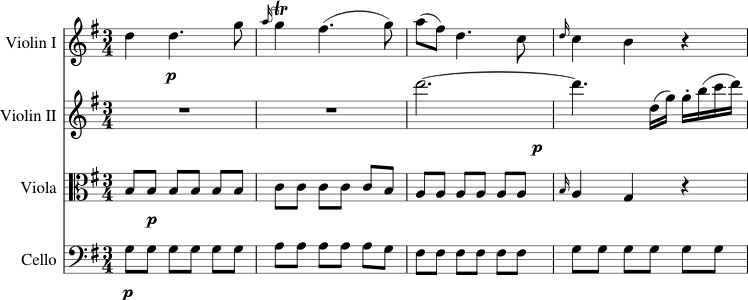

In [16]:
sExcerpt = s.measures(1, 4)
sExcerpt.id = 'excerpt'
sExcerpt.show()

This excerpt has a more interesting `.derivation`:

In [17]:
sExcerpt.derivation

<Derivation of <music21.stream.Score excerpt> from <music21.stream.Score mozartK80> via "measures">

There are three things that are reported by the `__repr__` of the :class:`~music21.derivation.Derivation` object: the client (that is the element housing the Derivation object), the origin (that is the Stream that the client was derived from), and the method that derived the new Stream:

In [18]:
sExcerpt.derivation.client

<music21.stream.Score excerpt>

In [19]:
sExcerpt.derivation.origin

<music21.stream.Score mozartK80>

In [20]:
sExcerpt.derivation.method

'measures'

Let's create another Stream from the Excerpt, this time, via transposition:

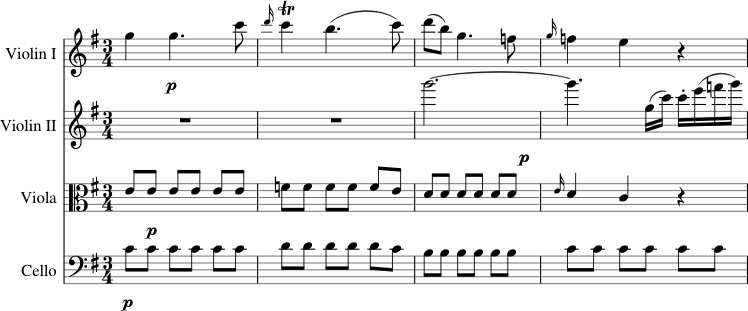

In [21]:
sTransposed = sExcerpt.transpose('P4')
sTransposed.show()

In [22]:
sTransposed.id = 'transposed'
sTransposed.derivation

<Derivation of <music21.stream.Score transposed> from <music21.stream.Score excerpt> via "transpose">

In [23]:
sTransposed.derivation.method

'transpose'

Now this Stream has an origin, and that Stream has an origin. If we wanted to know where everything came from, we can use the `.rootDerivation` property:

In [24]:
sTransposed.derivation.origin

<music21.stream.Score excerpt>

In [25]:
sTransposed.derivation.origin.derivation.origin

<music21.stream.Score mozartK80>

In [26]:
sTransposed.derivation.rootDerivation

<music21.stream.Score mozartK80>

If we wnat to know the whole history of where this Stream comes from, we can use the `.chain()` method on the Derivation object:

In [27]:
for previousScore in sTransposed.derivation.chain():
    print(previousScore)

<music21.stream.Score excerpt>
<music21.stream.Score mozartK80>


Note that derived Streams retain information about where they came from, but not vice-versa: there's no way to go from the original "mozartK80" Stream back to the "transposed" Stream.

There are good uses for the derivation chain.  For instance, what if we want to change every `piano` mark to a `forte`, we might define a function to do that on a Stream and then call it on `sTransposed`:

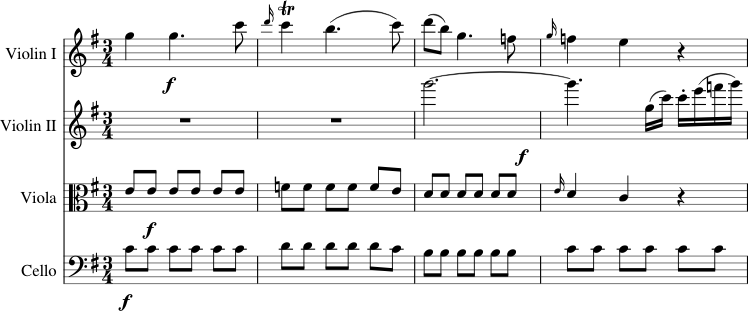

In [30]:
def makeLouder(s):
    for dyn in s.recurse().getElementsByClass('Dynamic'):
        dyn.value = 'f'

makeLouder(sTransposed)
sTransposed.show()

That's pretty cool, but our original score is unchanged:

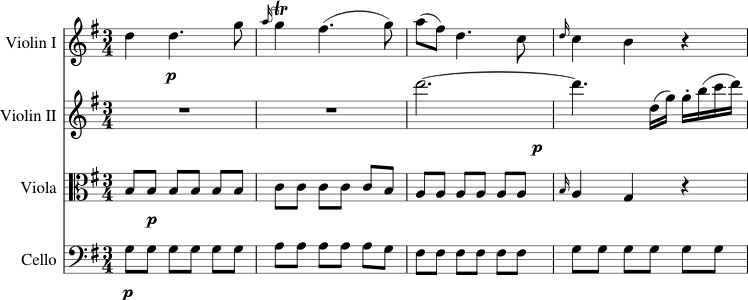

In [31]:
sExcerpt.show()

So, if we want to backtrack up the history of the score, let's call `makeLouder` on each Score in the `.derivation.chain()` (and now you might see why we make `makeLouder` a function to begin with:)

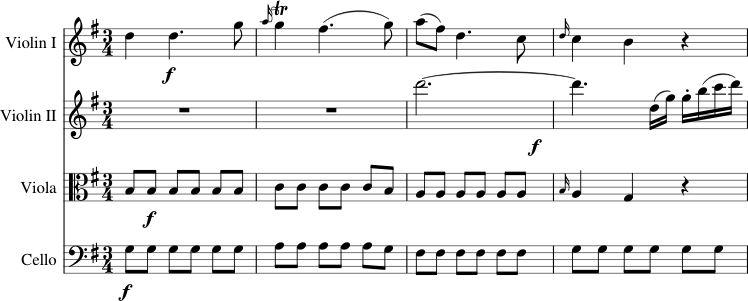

In [32]:
for s in sTransposed.derivation.chain():
    makeLouder(s)

sExcerpt.show()

I hope that this gave a sense not only what Derviations are, but also why you might use them.  Let's move on to ...[topic to be written]...